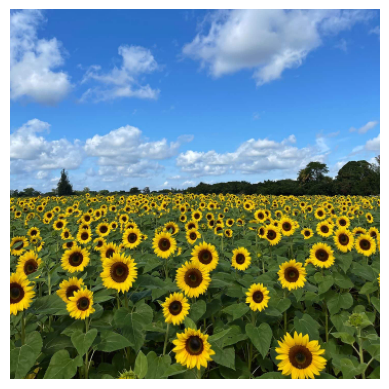

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\damsi\Desktop\Projects\Fitting and Alignment\Resources\the_berry_farms_sunflower_field.jpeg", cv2.IMREAD_REDUCED_COLOR_4)
assert img is not None

plt.figure()
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

Current sigma value: 0.8
Current sigma value: 1.65
Current sigma value: 2.5
Parameters of the largest circle:
Center: (107, 256)
Radius: 16
Sigma value: 2.5


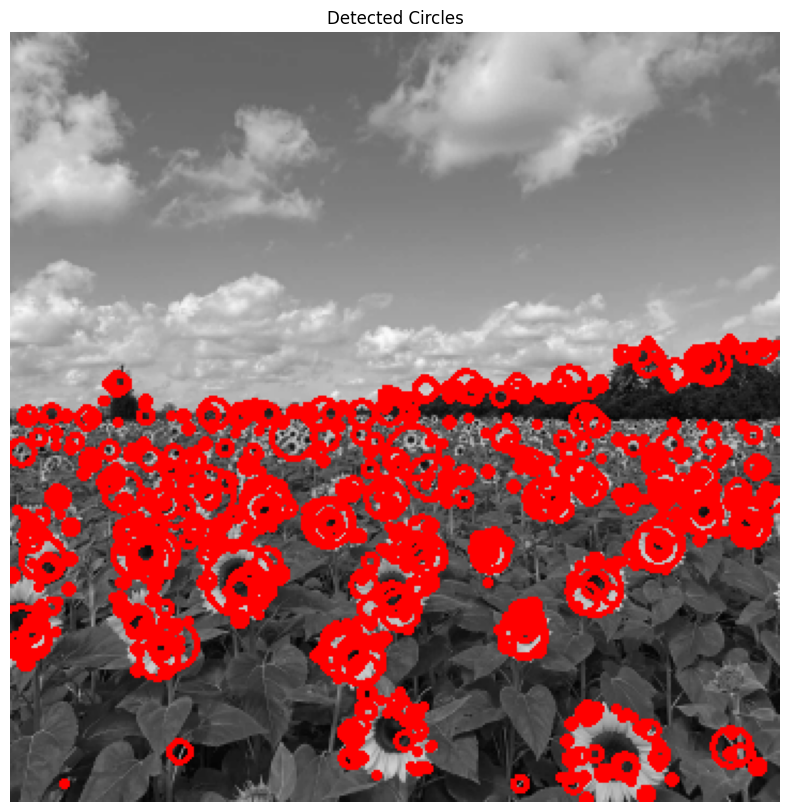

In [24]:
# Convert the image to grayscale for further processing
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set up parameters for scale-space extrema detection
min_sigma = 0.8  # Minimum sigma value (slightly smaller values for smaller blobs)
max_sigma = 2.5  # Maximum sigma value (slightly larger values for larger blobs)
num_sigma = 3  # Number of sigma values to test (increased to capture more scales)
threshold = 0.35  # Threshold for blob detection (slightly increased)

# Create an empty list to store detected circles
circles = []

# Loop through different sigma values to detect blobs at different scales
for sigma in np.linspace(min_sigma, max_sigma, num_sigma):
    # Print the current sigma value to the console
    print(f"Current sigma value: {sigma}")

    # Apply LoG (Laplacian of Gaussian) to the grayscale image with the current sigma
    blurred = cv2.GaussianBlur(gray_img, (0, 0), sigma)
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)

    # Calculate the absolute Laplacian values
    abs_laplacian = np.abs(laplacian)

    # Create a binary image where blobs are detected using the threshold
    blob_mask = abs_laplacian > threshold * abs_laplacian.max()

    # Find contours in the blob mask
    contours, _ = cv2.findContours(blob_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the detected contours and fit circles to them
    for contour in contours:
        if len(contour) >= 5:
            (x, y), radius = cv2.minEnclosingCircle(contour)
            center = (int(x), int(y))
            radius = int(radius)
            circles.append((center, radius, sigma))

# Sort the detected circles by radius in descending order
circles.sort(key=lambda x: -x[1])

# Report the parameters of the largest circle
if circles:
    largest_circle = circles[0]
    center, radius, sigma = largest_circle
    print("Parameters of the largest circle:")
    print(f"Center: {center}")
    print(f"Radius: {radius}")
    print(f"Sigma value: {sigma}")
else:
    print("No circles were detected.")

# Set the desired line thickness for drawn circles
line_thickness = 2  # Slightly increased line thickness

# Draw all detected circles on the original image
output_image = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR)
for circle in circles:
    center, radius, _ = circle
    cv2.circle(output_image, center, radius, (0, 0, 255), line_thickness)  # Red color

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.axis('off')
plt.title('Detected Circles')
plt.show()